<a href="https://colab.research.google.com/github/CMOONCS/Outreach_JC_AI4F/blob/main/Introduction_to_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Your Title Here
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))


In [ ]:
#@title Take Your photo
img = take_photo()

In [ ]:
#@title Show the Photo
#from google.colab.patches import cv2_imshow
#cv2_imshow(img)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
#@title Show the Information
img.shape

In [ ]:
#@title Resize the Image
import cv2
img_resize = cv2.resize(img,(400,300))
plt.imshow(img)
plt.show()

In [ ]:
#@title Image Pixels
print(img_resize)


In [ ]:
#@title Change Image to GrayScale
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
plt.show()

# Let's Try a Face Detection Model

### Step 1: Follow the given instruction
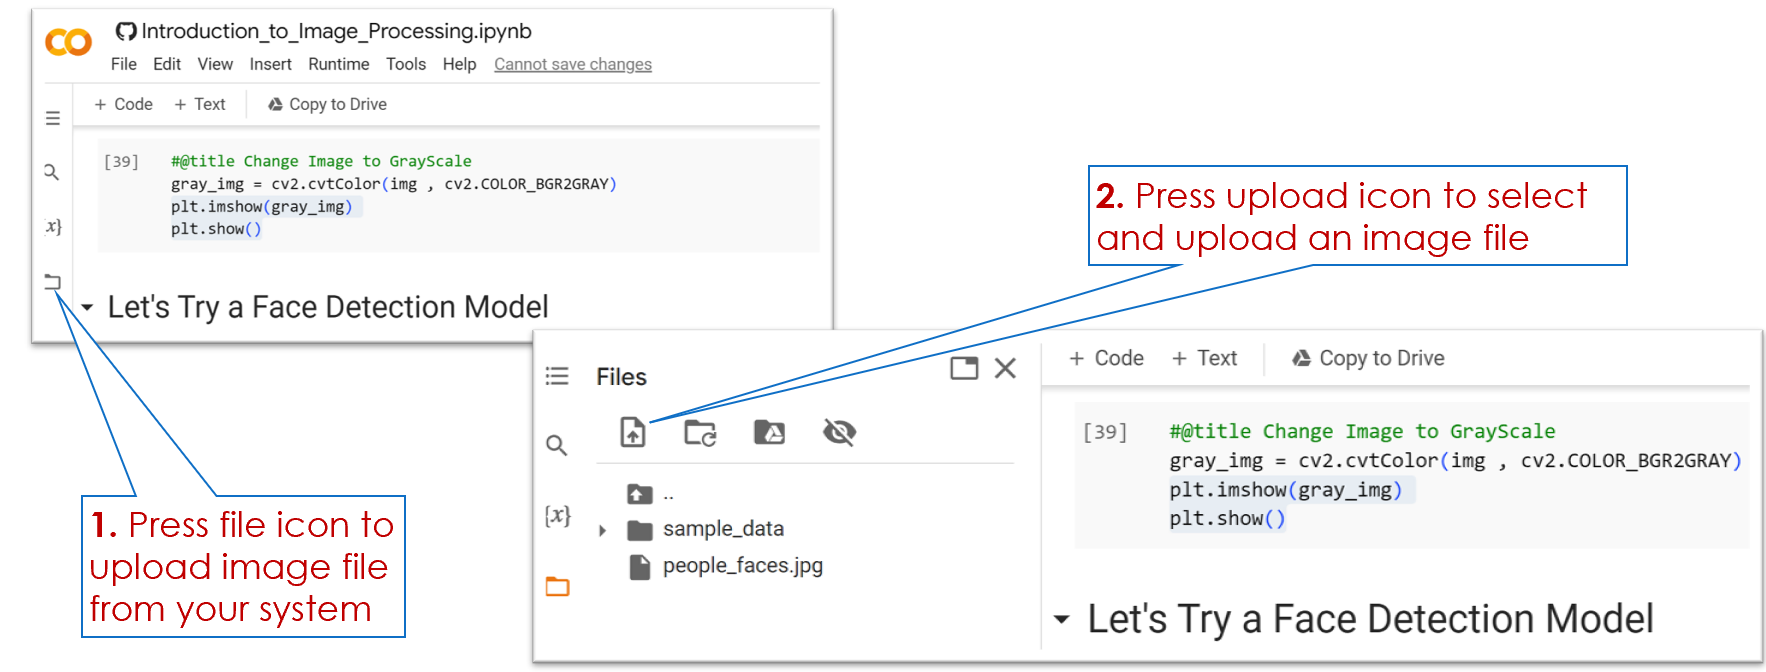

In [ ]:
#@title Step 2: Load an Image
from google.colab.patches import cv2_imshow
import cv2
image_path = 'people_faces.jpg'
img1 = cv2.imread(image_path)
#plt.imshow(img1)
#plt.show()
cv2_imshow(img1)


In [ ]:
#@title Step 3: Use a Face Detection Model
gray_img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)
face_detection = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
detection = face_detection.detectMultiScale(gray_img1, scaleFactor = 1.7)

In [ ]:
#@title Step 4: Display the Detected Faces
for (x , y , w , h) in detection:
   cv2.rectangle(img1 , (x , y) , (x+w , y+h) , (0 , 255 , 0) , 5)
cv2_imshow(img1)
"""plt.imshow(img1)
plt.show()"""

In [ ]:
cv2_imshow(img1)